## installing packages


In [ ]:
!pip install transformers farasapy datasets

     |████████████████████████████████| 3.8 MB 5.4 MB/s 
     |████████████████████████████████| 325 kB 48.1 MB/s 
     |████████████████████████████████| 895 kB 46.9 MB/s 
     |████████████████████████████████| 6.5 MB 32.4 MB/s 
     |████████████████████████████████| 67 kB 4.4 MB/s 
     |████████████████████████████████| 596 kB 43.9 MB/s 
     |████████████████████████████████| 1.1 MB 43.0 MB/s 
     |████████████████████████████████| 212 kB 45.2 MB/s 
     |████████████████████████████████| 134 kB 47.8 MB/s 
     |████████████████████████████████| 127 kB 41.1 MB/s 
     |████████████████████████████████| 94 kB 1.4 MB/s 
     |████████████████████████████████| 271 kB 39.0 MB/s 
     |████████████████████████████████| 144 kB 35.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling

In [ ]:
# !pip install arabic-reshaper python-bidi

In [ ]:
!pip install pyyaml==5.4.1


     |████████████████████████████████| 636 kB 5.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


## Download ARCD & Arabic SQUAD & AQAAD

In [ ]:
!wget https://raw.githubusercontent.com/husseinmozannar/SOQAL/master/data/arcd.json
!wget https://raw.githubusercontent.com/husseinmozannar/SOQAL/master/data/Arabic-SQuAD.json
!pip install gdown
!gdown https://drive.google.com/uc?id=1jhUmWb9eHVATqhrWKAXxSE2gqJ53-wk6 -O AAQAD.json

--2022-03-28 11:01:28--  https://raw.githubusercontent.com/husseinmozannar/SOQAL/master/data/arcd.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1942371 (1.9M) [text/plain]
Saving to: ‘arcd.json’

arcd.json           100%[===================>]   1.85M  --.-KB/s    in 0.05s   

2022-03-28 11:01:28 (33.7 MB/s) - ‘arcd.json’ saved [1942371/1942371]

--2022-03-28 11:01:28--  https://raw.githubusercontent.com/husseinmozannar/SOQAL/master/data/Arabic-SQuAD.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51323713 (49M) [text/p

## Loading ARCD & Arabic SQUAD & AQAAD

In [ ]:
arcd_path = "/content/arcd.json"
ar_squad_path= "/content/Arabic-SQuAD.json"
ar_AAQAD_path= "/content/AAQAD.json"

import json 
def read_data(datapath):
  with open(datapath ,'rb') as fp:
    data = json.load(fp)
  return data 


In [ ]:
ar_squad_data=read_data(ar_squad_path)

In [ ]:
sample =ar_squad_data['data'][10]['paragraphs'][0]
text = sample['context']
q = sample['qas'][0]['question']
answers= sample['qas'][0]['answers']
print(q , answers)
answer_start= answers[0]['answer_start']
answer_end =answer_start+ len(answers[0]['text'])
print(text[answer_start:answer_end])

السنسكريتية هي اللغة المقدسة الأولى لأي دين؟ [{'text': 'للهندوسية', 'answer_start': 134}]
للهندوسية


In [ ]:
ar_squad_data['data'][0]['paragraphs'][0]

{'context': 'يعتمد ASCII أساس ا على الأبجدية الإنجليزية ، ويقوم بترميز 128 حرف ا محدد ا في أعداد صحيحة من سبعة أجزاء كما هو موضح في مخطط ASCII على اليمين . الأحرف المشفرة هي الأرقام من 0 إلى 9 ، والأحرف الصغيرة ا إلى ز ، والأحرف الكبيرة A إلى Z ، ورموز الترقيم الأساسية ، ورموز التحكم التي نشأت مع أجهزة تيليتيبي ، ومساحة . على سبيل المثال ، سيصبح الحرف الصغير ج 1101010 والعشري 106 . تتضمن ASCII تعريفات لـ 128 حرف ا 33 حرف ا تحكم ا غير الطباعة العديد منها الآن قديمة تؤثر على كيفية معالجة النص والمساحة و 95 حرف ا قابلا للطباعة ، بما في ذلك المساحة التي ي عتبر رسم ا غير مرئي 223 .',
 'qas': [{'answers': [{'answer_start': 23, 'text': 'الأبجدية الإنجليزية'}],
   'id': '570bce516b8089140040fa42',
   'question': 'ما هو ASCII على أساس؟'},
  {'answers': [{'answer_start': 58, 'text': '128 حرف ا محدد'}],
   'id': '570bce516b8089140040fa43',
   'question': 'كم شخصيات محددة موجودة في كود ASCII؟'},
  {'answers': [{'answer_start': 405, 'text': '33 حرف ا تحكم ا غير الطباعة'}],
   'id': '570bce516b80891

In [ ]:
squad_data =[]
for sample in ar_squad_data['data']:
  paragraphs = sample['paragraphs']
  for passage in paragraphs:
    text =passage['context']
    for qas in passage['qas']:
      if len(qas['answers'])<1: 
        print(qas['answers']['text'])
        continue
      #for answer in qas['answers']:
      squad_data.append(
          {
              'passage':text,
              'question':qas['question'],
              # 'answers':qas['answers']
              'answers': [{
              'text':qas['answers'][0]['text'],
              'start_char':qas['answers'][0]['answer_start']
          }]
          }
      )

In [ ]:
squad_data[1000]
squad_data_part =[x for x in squad_data if "محمد" in x['passage'] ]

In [ ]:
print(len(squad_data))
# from sklearn.model_selection import train_test_split
# squad_data_part , test_data = train_test_split(squad_data , test_size= 0.6)
import random 
squad_data_part = random.sample(squad_data , 1000)

48344


In [ ]:
print(len(squad_data_part))
squad_data_part[100]

1000


{'answers': [{'start_char': 109, 'text': 'بفقدان السمع'}],
 'passage': 'من الجيل الخامس من يبود ، طرحت شركة اببلي حد ا للحجم القابل للتكوين من قبل المستخدم استجابة للمخاوف المتعلقة بفقدان السمع . أبلغ المستخدمون أنه في الجيل السادس من يبود ، الحد الأقصى لمستوى خرج الصوت محدد بـ 100 ديسيبل في أسواق الاتحاد الأوروبي . اضطرت شركة اببلي في السابق إلى إزالة أجهزة يبود من الأرفف في فرنسا لتجاوزها الحد القانوني . ومع ذلك ، أبلغ المستخدمون الذين اشتروا جهاز ا جديد ا من الجيل السادس من أجهزة يبود في أواخر عام 2013 عن خيار جديد سمح لهم بتعطيل حد حجم الاتحاد الأوروبي . لقد قيل أن أجهزة يبود الجديدة هذه مزودة ببرنامج محدث يسمح بهذا التغيير . إلا أن أجهزة يبود القديمة من الجيل السادس غير قادرة على التحديث إلى إصدار البرنامج هذا .',
 'question': 'ما هو نوع المسألة الحسية التي كانت مصدر قلق قبل إصدار iPod 5s Gen؟'}

In [ ]:
# import pandas as pd
# squad_datadf = pd.DataFrame(train_data).sample(frac=0.4).reset_index()
# #valdatadf = pd.DataFrame(test_data).sample(frac=0.02).reset_index()
# testdatadf =pd.DataFrame(test_data)

In [ ]:
# squad_datadf.head()

In [ ]:
#squad_datadf.info()

In [ ]:
#datadf_squad.to_csv('squad_3868.csv')

In [ ]:
#sample =squad_datadf.iloc[0:3]

In [ ]:
#len(squad_datadf['question'])

## loading the Quran QA & our data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_data_path = r'/content/drive/MyDrive/Quran_QA/Q_QA_task_original_code/quranqa/datasets/qrcd_v1.1_train.jsonl'
AQQAC_data = r'/content/drive/MyDrive/Quran_QA/data/AQQAC_less_384.jsonl'
dev_data_path = r'/content/drive/MyDrive/Quran_QA/Q_QA_task_original_code/quranqa/datasets/qrcd_v1.1_dev.jsonl'

import json 
def read_data(datapath):
  with open(datapath ,'rb') as fp:
      datalist = list(fp)
  data =[]
  for json_str in datalist:
      result = json.loads(json_str)
      # print(f"result: {result}")
      data.append(result)
  return data 


In [ ]:
quran_data=read_data(train_data_path)

In [ ]:
print(len(quran_data))

710


In [ ]:
val_data=read_data(dev_data_path)

In [ ]:
print(len(val_data))

109


In [ ]:
AQQAC_data=read_data(AQQAC_data)

In [ ]:
print(len(AQQAC_data))

618


in this cell i will separate every sample that has many answers to a separate sample with a single answer , so this will make every sample have 1 answer for training , this is an initial idea until we see another idea


In [ ]:
# single answer 
# multi  answer 3 -> 3 samples 
def split_multi_answers(data_list):
  new_data=[]
  for sample in data_list :
    if len(sample['answers']) ==1:
      new_data.append(sample)
      continue
    # print(sample)
    for answer in sample['answers']:
      new_sample={
        'answers':[answer],
        'passage':sample['passage'],
        'pq_id':sample['pq_id'],
        'question': sample['question'],
        'surah':sample['surah'],
        'verses':sample['verses']
      }
      new_data.append(new_sample)
  return new_data 
quran_data= split_multi_answers(quran_data)
AQQAC_data=split_multi_answers(AQQAC_data)
# val_data= split_multi_answers(val_data)
# 5 answers #
# حمر مستنفرة فررت من قسورة 

In [ ]:
print("quran_data",len(quran_data))
print("AQQAC_data",len(AQQAC_data))
print("val_data",len(val_data))



quran_data 861
AQQAC_data 618
val_data 109


shuffling the data then taking random 100 sample for validation (will test with our custom samples)

In [ ]:
# for sample in new_data : print(sample['answers'])
from random import shuffle

print("quran_data before shuffle",quran_data[0])
shuffle(quran_data)
print("quran_data after shuffle",quran_data[0])

print("AQQAC_data before shuffle",AQQAC_data[0])
shuffle(AQQAC_data)
print("AQQAC_data after shuffle",AQQAC_data[0])

# print("squad before shuffle",squad_data_part[0])
# shuffle(squad_data_part)
# print("squad after shuffle",squad_data_part[0])


shuffle(val_data)



quran_data before shuffle {'pq_id': '2:8-16_364', 'passage': 'ومن الناس من يقول آمنا بالله وباليوم الآخر وما هم بمؤمنين. يخادعون الله والذين آمنوا وما يخدعون إلا أنفسهم وما يشعرون. في قلوبهم مرض فزادهم الله مرضا ولهم عذاب أليم بما كانوا يكذبون. وإذا قيل لهم لا تفسدوا في الأرض قالوا إنما نحن مصلحون. ألا إنهم هم المفسدون ولكن لا يشعرون. وإذا قيل لهم آمنوا كما آمن الناس قالوا أنؤمن كما آمن السفهاء ألا إنهم هم السفهاء ولكن لا يعلمون. وإذا لقوا الذين آمنوا قالوا آمنا وإذا خلوا إلى شياطينهم قالوا إنا معكم إنما نحن مستهزئون. الله يستهزئ بهم ويمدهم في طغيانهم يعمهون. أولئك الذين اشتروا الضلالة بالهدى فما ربحت تجارتهم وما كانوا مهتدين.', 'surah': 2, 'verses': '8-16', 'question': 'لماذا سيُحاسب ويُعذب الضال يوم القيامة ان كان ""من يضلل الله فما له من هاد"" كما ورد من قوله تعالى في آية 23 و آية 36 من سورة الزمر؟', 'answers': [{'text': 'أولئك الذين اشتروا الضلالة بالهدى', 'start_char': 504}]}
quran_data after shuffle {'pq_id': '3:33-41_122', 'passage': 'إن الله اصطفى آدم ونوحا وآل إبراهيم وآل عمرا

In [ ]:
print("quran_data",len(quran_data))
print("AQQAC_data",len(AQQAC_data))
print("val_data",len(val_data))
print("squad_data_part",len(squad_data_part))


quran_data 861
AQQAC_data 618
val_data 109
squad_data_part 1000


## combined data [SQuAD & Quran QA & our data]

In [ ]:
all_data=[]
all_data.extend(quran_data)
# all_data.extend(squad_data_part)
all_data.extend(AQQAC_data)

from random import shuffle

print("all data before shuffle",all_data[500])
shuffle(all_data)
print("all data after shuffle",all_data[500])

print(len(all_data))

all data before shuffle {'pq_id': '22:23-24_311', 'passage': 'إن الله يدخل الذين آمنوا وعملوا الصالحات جنات تجري من تحتها الأنهار يحلون فيها من أساور من ذهب ولؤلؤا ولباسهم فيها حرير. وهدوا إلى الطيب من القول وهدوا إلى صراط الحميد.', 'surah': 22, 'verses': '23-24', 'question': 'ما هو أثر الكلام الطيب؟', 'answers': [{'text': 'هدوا إلى الطيب من القول وهدوا إلى صراط الحميد', 'start_char': 122}]}
all data after shuffle {'pq_id': '62:1-4_164', 'passage': 'يسبح لله ما في السماوات وما في الأرض الملك القدوس العزيز الحكيم. هو الذي بعث في الأميين رسولا منهم يتلو عليهم آياته ويزكيهم ويعلمهم الكتاب والحكمة وإن كانوا من قبل لفي ضلال مبين. وآخرين منهم لما يلحقوا بهم وهو العزيز الحكيم. ذلك فضل الله يؤتيه من يشاء والله ذو الفضل العظيم.', 'surah': 62, 'verses': '1-4', 'question': 'ما المخلوقات التي تسبح الله؟', 'answers': [{'text': 'يسبح لله ما في السماوات وما في الأرض', 'start_char': 0}]}
1479


In [ ]:
import pandas as pd
all_datadf = pd.DataFrame(all_data)
valdatadf = pd.DataFrame(val_data)


In [ ]:
all_datadf.head()

,pq_id,passage,surah,verses,question,answers
0,5:35-37_357,يا أيها الذين آمنوا اتقوا الله وابتغوا إليه ال...,5.0,35-37,ما هو فضل الجهاد في سبيل الله؟,"[{'text': 'جاهدوا في سبيله لعلكم تفلحون', 'sta..."
1,NaN,إن الإنسان خلق هلوعا إذا مسه الشر جزوعا وإذا م...,NaN,NaN,ما صفات المصلين,[{'text': 'والذين في أموالهم حق معلوم للسائل و...
2,7:159-162_231,ومن قوم موسى أمة يهدون بالحق وبه يعدلون. وقطعن...,7.0,159-162,ما هي انواع الحيوانات التي ذكرت في القرآن؟,"[{'text': 'السلوى', 'start_char': 216}]"
3,11:77-83_362,ولما جاءت رسلنا لوطا سيء بهم وضاق بهم ذرعا وقا...,11.0,77-83,هل استخدم لفظ (المطر) في القرآن للعذاب فقط؟,"[{'text': 'أمطرنا عليها حجارة من سجيل منضود', ..."
4,74:32-48_330,كلا والقمر. والليل إذ أدبر. والصبح إذا أسفر. إ...,74.0,32-48,ما هي الدلائل التي تشير بأن الانسان مخير؟,"[{'text': 'لمن شاء منكم أن يتقدم أو يتأخر', 's..."


In [ ]:
all_datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pq_id     861 non-null    object 
 1   passage   1479 non-null   object 
 2   surah     861 non-null    float64
 3   verses    861 non-null    object 
 4   question  1479 non-null   object 
 5   answers   1479 non-null   object 
dtypes: float64(1), object(5)
memory usage: 69.5+ KB


In [ ]:
sample =all_datadf.iloc[0:3]

In [ ]:
all_datadf.drop(all_datadf.columns.difference(['question','answers','passage']), 1, inplace=True)
all_datadf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,passage,question,answers
0,يا أيها الذين آمنوا اتقوا الله وابتغوا إليه ال...,ما هو فضل الجهاد في سبيل الله؟,"[{'text': 'جاهدوا في سبيله لعلكم تفلحون', 'sta..."
1,إن الإنسان خلق هلوعا إذا مسه الشر جزوعا وإذا م...,ما صفات المصلين,[{'text': 'والذين في أموالهم حق معلوم للسائل و...
2,ومن قوم موسى أمة يهدون بالحق وبه يعدلون. وقطعن...,ما هي انواع الحيوانات التي ذكرت في القرآن؟,"[{'text': 'السلوى', 'start_char': 216}]"
3,ولما جاءت رسلنا لوطا سيء بهم وضاق بهم ذرعا وقا...,هل استخدم لفظ (المطر) في القرآن للعذاب فقط؟,"[{'text': 'أمطرنا عليها حجارة من سجيل منضود', ..."
4,كلا والقمر. والليل إذ أدبر. والصبح إذا أسفر. إ...,ما هي الدلائل التي تشير بأن الانسان مخير؟,"[{'text': 'لمن شاء منكم أن يتقدم أو يتأخر', 's..."


In [ ]:
all_datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   passage   1479 non-null   object
 1   question  1479 non-null   object
 2   answers   1479 non-null   object
dtypes: object(3)
memory usage: 34.8+ KB


In [ ]:
len(all_datadf['question'])

1479

## Data Viualization

*   Histogram of the question length
*   Histogram of passage length 
*   Histogram of the most common n words 
*   Histogram of most common n bi-grams







##### Visulaization for all data

[]

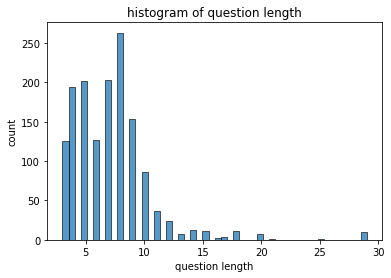

In [ ]:
#all_datadf
import seaborn as sns

axs =sns.histplot([len(q.split()) for q in all_datadf['question'].tolist()])
axs.set(title ='histogram of question length' ,xlabel = 'question length', ylabel='count')
axs.plot()

[]

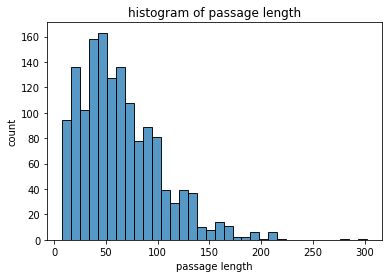

In [ ]:
#all_datadf
import seaborn as sns

axs =sns.histplot([len(q.split()) for q in all_datadf['passage'].tolist()])
axs.set(title ='histogram of passage length' ,xlabel = 'passage length', ylabel='count')
axs.plot()

In [ ]:
#all_datadf
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
Counter(" ".join(all_datadf["passage"]).split()).most_common(200)
labels, values = zip(*Counter(" ".join(all_datadf["passage"]).split()).most_common(30))

fig = px.bar( x=labels, y=values)
fig.update_layout(
    title ='word frequency',
    xaxis_title='word',
    yaxis_title='count'
)
fig.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
#all_datadf
from collections import Counter
from nltk import ngrams
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

labels, values = zip(*Counter(ngrams(" ".join(all_datadf["passage"]).split(), 2)).most_common(20))
labels =[' '.join(x) for x in labels]
fig = px.bar( x=labels , y=values )
fig.update_layout(
    title ='bi-gram frequency',
    xaxis_title='words',
    yaxis_title='count'
)
fig.show()

In [ ]:
#all_datadf
from collections import Counter
from nltk import ngrams
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

labels, values = zip(*Counter(ngrams(" ".join(all_datadf["passage"]).split(), 3)).most_common(20))
labels =[' '.join(x) for x in labels]
fig = px.bar( x=labels , y=values )
fig.update_layout(
    title ='tri-gram frequency',
    xaxis_title='words',
    yaxis_title='count'
)
fig.show()

In [ ]:
# [len(q.split()) for q in datadf['question'].tolist()]

In [ ]:
#AQQAC_datadf
import seaborn as sns

axs =sns.histplot([len(q.split()) for q in AQQAC_datadf['question'].tolist()])
axs.set(title ='histogram of question length' ,xlabel = 'question length', ylabel='count')
axs.plot()

NameError: ignored

In [ ]:
import seaborn as sns

axs =sns.histplot([len(q.split()) for q in datadf['question'].tolist()])
axs.set(title ='histogram of question length' ,xlabel = 'question length', ylabel='count')
axs.plot()

In [ ]:
#AQQAC_datadf
import seaborn as sns

axs =sns.histplot([len(q.split()) for q in AQQAC_datadf['passage'].tolist()])
axs.set(title ='histogram of passage length' ,xlabel = 'passage length', ylabel='count')
axs.plot()

In [ ]:
import seaborn as sns

axs =sns.histplot([len(q.split()) for q in datadf['passage'].tolist()])
axs.set(title ='histogram of passage length' ,xlabel = 'passage length', ylabel='count')
axs.plot()

In [ ]:
from collections import Counter

Counter(" ".join(datadf["passage"]).split()).most_common(20)

In [ ]:
#AQQAC_datadf
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
Counter(" ".join(AQQAC_datadf["passage"]).split()).most_common(200)
labels, values = zip(*Counter(" ".join(AQQAC_datadf["passage"]).split()).most_common(30))

fig = px.bar( x=labels, y=values)
fig.update_layout(
    title ='word frequency',
    xaxis_title='word',
    yaxis_title='count'
)
fig.show()

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
Counter(" ".join(datadf["passage"]).split()).most_common(200)
labels, values = zip(*Counter(" ".join(datadf["passage"]).split()).most_common(30))

fig = px.bar( x=labels, y=values)
fig.update_layout(
    title ='word frequency',
    xaxis_title='word',
    yaxis_title='count'
)
fig.show()

In [ ]:
#AQQAC_datadf
from collections import Counter
from nltk import ngrams
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

labels, values = zip(*Counter(ngrams(" ".join(AQQAC_datadf["passage"]).split(), 2)).most_common(20))
labels =[' '.join(x) for x in labels]
fig = px.bar( x=labels , y=values )
fig.update_layout(
    title ='bi-gram frequency',
    xaxis_title='words',
    yaxis_title='count'
)
fig.show()

In [ ]:
from collections import Counter
from nltk import ngrams
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

labels, values = zip(*Counter(ngrams(" ".join(datadf["passage"]).split(), 2)).most_common(20))
labels =[' '.join(x) for x in labels]
fig = px.bar( x=labels , y=values )
fig.update_layout(
    title ='bi-gram frequency',
    xaxis_title='words',
    yaxis_title='count'
)
fig.show()

In [ ]:
#AQQAC_datadf
from collections import Counter
from nltk import ngrams
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

labels, values = zip(*Counter(ngrams(" ".join(AQQAC_datadf["passage"]).split(), 3)).most_common(20))
labels =[' '.join(x) for x in labels]
fig = px.bar( x=labels , y=values )
fig.update_layout(
    title ='tri-gram frequency',
    xaxis_title='words',
    yaxis_title='count'
)
fig.show()

In [ ]:
from collections import Counter
from nltk import ngrams
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

labels, values = zip(*Counter(ngrams(" ".join(datadf["passage"]).split(), 3)).most_common(20))
labels =[' '.join(x) for x in labels]
fig = px.bar( x=labels , y=values )
fig.update_layout(
    title ='tri-gram frequency',
    xaxis_title='words',
    yaxis_title='count'
)
fig.show()

## data preparing (preprocessing)

In [ ]:
from transformers import AutoTokenizer

transformer_name = "aubmindlab/bert-base-arabertv02"
model_path = "/content/drive/MyDrive/Quran_QA/quranBERT_moreepochs/checkpoint-6236/"
model_path = "/content/drive/MyDrive/Quran_QA/quranBERT/8epochs/"
tokenizer = AutoTokenizer.from_pretrained(model_path) # inputs id , attention mask 
# hospital -> 340 --> 111111100000


Could not locate the tokenizer configuration file, will try to use the model config instead.


OSError: ignored

In [ ]:
sample =all_datadf.sample(3).reset_index()

In [ ]:
sample

,index,passage,question,answers
0,319,قد أفلح المؤمنون الذين هم في صلاتهم خاشعون وال...,ما هي صفات المؤمنين,"[{'text': 'والذين هم للزكاه فاعلون', 'start_ch..."
1,966,قل للمخلفين من الأعراب ستدعون إلى قوم أولي بأس...,لماذا لا يكتفي المسلمون بالقرآن الكريم ويلجأون...,[{'text': 'من يطع الله ورسوله يدخله جنات تجري ...
2,467,يا أيها النبي جاهد الكفار والمنافقين واغلظ علي...,ما حكم من يرتد عن دين الإسلام؟,"[{'text': 'ما لهم في الأرض من ولي ولا نصير', '..."


In [ ]:
def preprocess_function(examples): 
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["passage"].tolist(),
        max_length=384,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length",
    )
    # visualization : max length , most common word , most common bi-gram , histogram of lengths 
    # {'input_ids': [ids], 'attention_mask':[111000], 'offest_mapping':[(1,5),(6,8)...] }
    # print(inputs)

    offset_mapping = inputs.pop("offset_mapping")
    # print(offset_mapping)
    answers = examples["answers"]
    start_positions = []
    end_positions = []
    # print(answers)
    # print(offset_mapping) 
    # print(answers)
    for i, offset in enumerate(offset_mapping): #loop every sample 
        answer = answers[i]
        # print(f'ans #{i}={answer}')
        start_char = answer[0]["start_char"]
        end_char = answer[0]["start_char"] + len(answer[0]["text"])
        sequence_ids = inputs.sequence_ids(i)
        # print(sequence_ids)
        # Find the start and end of the passage 0 , 1 
        #متي نزل الوحي إنا انزلناه في ليلة القدر --->
        #input_ids  : 23 43 56 56 78 90 95 67 
        #sequence_id: 0  0  0  1  1  1 
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        passage_start = idx

        while sequence_ids[idx] == 1:
            idx += 1
        passage_end = idx - 1

        # If the answer is not fully inside the passage, label it (0, 0)
        if offset[passage_start][0] > end_char or offset[passage_end][1] < start_char:
            start_positions.append(0)
            end_positions.append(0)
        else:

            # Otherwise it's the start and end token positions
            idx = passage_start
            while idx <= passage_end and offset[idx][0] <= start_char:
                idx += 1
          
            start_positions.append(idx - 1)
            idx = passage_end
            while idx >= passage_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)


    inputs["start_positions"] = start_positions 
    inputs["end_positions"] = end_positions     
    return inputs
preprocess_function(sample)

{'input_ids': [[2, 394, 634, 20598, 15970, 3, 602, 1600, 182, 194, 17315, 319, 860, 1891, 305, 27874, 336, 54821, 2557, 6767, 1891, 352, 12068, 185, 53183, 6767, 1891, 7780, 845, 195, 16559, 319, 6767, 1891, 10398, 2665, 201, 6816, 319, 981, 323, 50328, 336, 440, 394, 3852, 228, 559, 1315, 336, 19559, 650, 1382, 8680, 4170, 3177, 7329, 2905, 563, 56825, 7059, 1891, 5356, 5326, 6767, 1891, 16377, 4660, 336, 560, 52622, 201, 29907, 319, 6767, 1891, 323, 51499, 336, 17352, 319, 10331, 1891, 1499, 53547, 319, 860, 2074, 36541, 36842, 1891, 764, 1645, 319, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
# tokenized_data = preprocess_function(datadf)
tokenized_val_data = preprocess_function(valdatadf)
# tokenized_AQQAC_data=preprocess_function(AQQAC_datadf)
tokenized_all_data=preprocess_function(all_datadf)

from datasets import Dataset
# dataset= Dataset.from_dict(tokenized_data)
# AQQAC_data=Dataset.from_dict(tokenized_AQQAC_data)
valdataset= Dataset.from_dict(tokenized_val_data)
all_data=Dataset.from_dict(tokenized_all_data)
#pandas , dataset

In [ ]:
all_data

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
    num_rows: 1479
})

## loading model , training 

In [ ]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer
# model_path="/content/drive/MyDrive/Quran_QA/quranBERT/checkpoint-6236"
model = AutoModelForQuestionAnswering.from_pretrained(model_path , from_flax=True)

loading configuration file /content/drive/MyDrive/Quran_QA/quranBERT_moreepochs/checkpoint-12472/config.json
Model config BertConfig {
  "_name_or_path": "/content/drive/MyDrive/Quran_QA/quranBERT_moreepochs/checkpoint-12472",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 64000
}



OSError: ignored

In [ ]:
# from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer

# model = AutoModelForQuestionAnswering.from_pretrained(transformer_name)

In [ ]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(tokenizer, mlm_probability=0.1)

In [ ]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Quran_QA/models/quranBERTqa_cutout",
    save_strategy='steps',
    save_steps =1480,
    evaluation_strategy= "epoch",
    learning_rate= 1e-5,
    per_device_train_batch_size=2 ,
    per_device_eval_batch_size=2 ,
    num_train_epochs=4,
    weight_decay=0.01,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset= all_data,
    eval_dataset=valdataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [ ]:
all_data

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
    num_rows: 1479
})

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1479
  Num Epochs = 4
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 2960


TypeError: ignored

In [ ]:
# model.save_pretrained(model_path+'all3data2epochwith9k')

In [ ]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer , AutoTokenizer
model_path= "/content/drive/MyDrive/Quran_QA/models/quranBERTqa_2/checkpoint-740"
model_path= "/content/drive/MyDrive/Quran_QA/models/quranBERTqa_3/checkpoint-4960"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForQuestionAnswering.from_pretrained(model_path)
model.to("cuda")

Didn't find file /content/drive/MyDrive/Quran_QA/models/quranBERTqa_3/checkpoint-4960/added_tokens.json. We won't load it.
loading file /content/drive/MyDrive/Quran_QA/models/quranBERTqa_3/checkpoint-4960/vocab.txt
loading file /content/drive/MyDrive/Quran_QA/models/quranBERTqa_3/checkpoint-4960/tokenizer.json
loading file None
loading file /content/drive/MyDrive/Quran_QA/models/quranBERTqa_3/checkpoint-4960/special_tokens_map.json
loading file /content/drive/MyDrive/Quran_QA/models/quranBERTqa_3/checkpoint-4960/tokenizer_config.json
loading configuration file /content/drive/MyDrive/Quran_QA/models/quranBERTqa_3/checkpoint-4960/config.json
Model config BertConfig {
  "_name_or_path": "/content/drive/MyDrive/Quran_QA/models/quranBERTqa_3/checkpoint-4960",
  "architectures": [
    "BertForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "i

BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(64000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

## testing the model

In [ ]:
from transformers import pipeline
from scipy.special import softmax
import torch

min_answer_length=3
number_of_required_answers = 5
def quran_qa(text , question, show_all=False):
    ranked_answers=[]
    inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt").to("cuda") 
    input_ids = inputs["input_ids"].tolist()[0]
    # print(inputs)
    outputs = model(**inputs) # predict two lists ( startsss , endsss ) argmax [3 , 4, 5 , 6 ,-4 , 3]
    # print(outputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

    # Get the most likely beginning of answer with the argmax of the score
    # answer_start = torch.argmax(answer_start_scores)
    answer_starts_probs = softmax(torch.topk(answer_start_scores , 5).values.cpu().detach().numpy())[0]
    # print(answer_starts_probs)
    answer_starts =  torch.topk(answer_start_scores , 5).indices
    # Get the most likely end of answer with the argmax of the score
    # answer_end = torch.argmax(answer_end_scores) + 1
    answer_ends_probs = softmax(torch.topk(answer_end_scores, 5).values.cpu().detach().numpy())[0]
    answer_ends = torch.topk(answer_end_scores, 5).indices +1
    print(f"Question: {question}")
    idx =0
    for i , answer_start in enumerate(answer_starts.tolist()[0]):
     for j , answer_end in enumerate(answer_ends.tolist()[0]):
        idx+=1
        if (
                answer_end < answer_start
                or answer_end - answer_start + 1 < min_answer_length
            ):
                continue
        answer = tokenizer.convert_tokens_to_string(
            tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end])
        )
        
        ranked_answers.append(
            {
                'answer': answer,
                  'rank' : len(ranked_answers)+1,
                  'score':float(answer_starts_probs[i]*answer_ends_probs[j])
            }
        )
    #sort by probability 
    ranked_answers.sort(key =lambda x : x['score'], reverse =True)
    ranked_answers = ranked_answers[:number_of_required_answers]
    # reset rank 
    for i , answer in enumerate(ranked_answers): answer['rank']=i+1
    if len(ranked_answers)==0: raise BaseException("empty list ")
    print('top predicted answer:', )
    return ranked_answers

### testing

In [ ]:
data[0]

{'answers': [{'start_char': 504, 'text': 'أولئك الذين اشتروا الضلالة بالهدى'}],
 'passage': 'ومن الناس من يقول آمنا بالله وباليوم الآخر وما هم بمؤمنين. يخادعون الله والذين آمنوا وما يخدعون إلا أنفسهم وما يشعرون. في قلوبهم مرض فزادهم الله مرضا ولهم عذاب أليم بما كانوا يكذبون. وإذا قيل لهم لا تفسدوا في الأرض قالوا إنما نحن مصلحون. ألا إنهم هم المفسدون ولكن لا يشعرون. وإذا قيل لهم آمنوا كما آمن الناس قالوا أنؤمن كما آمن السفهاء ألا إنهم هم السفهاء ولكن لا يعلمون. وإذا لقوا الذين آمنوا قالوا آمنا وإذا خلوا إلى شياطينهم قالوا إنا معكم إنما نحن مستهزئون. الله يستهزئ بهم ويمدهم في طغيانهم يعمهون. أولئك الذين اشتروا الضلالة بالهدى فما ربحت تجارتهم وما كانوا مهتدين.',
 'pq_id': '2:8-16_364',
 'question': 'لماذا سيُحاسب ويُعذب الضال يوم القيامة ان كان ""من يضلل الله فما له من هاد"" كما ورد من قوله تعالى في آية 23 و آية 36 من سورة الزمر؟',
 'surah': 2,
 'verses': '8-16'}

In [ ]:
def compare_sample(index):
  print(index)
  print(f"passage :{data[index]['passage']}")
  print(f'actual question :{data[index]["question"]}')
  print(f"actual answer : {data[index]['answers']}")
  return quran_qa(data[index]['passage'], data[index]['question'])

In [ ]:
def compare_val_sample(index):
  print(index)
  print(f"passage :{val_data[index]['passage']}")
  print(f'actual question :{val_data[index]["question"]}')
  print(f"actual answer : {val_data[index]['answers']}")
  return quran_qa(val_data[index]['passage'], val_data[index]['question'])

In [ ]:
from pprint import pprint
pprint(compare_val_sample(10))

10
passage :ولئن سألتهم من خلق السماوات والأرض وسخر الشمس والقمر ليقولن الله فأنى يؤفكون. الله يبسط الرزق لمن يشاء من عباده ويقدر له إن الله بكل شيء عليم. ولئن سألتهم من نزل من السماء ماء فأحيا به الأرض من بعد موتها ليقولن الله قل الحمد لله بل أكثرهم لا يعقلون. وما هذه الحياة الدنيا إلا لهو ولعب وإن الدار الآخرة لهي الحيوان لو كانوا يعلمون. فإذا ركبوا في الفلك دعوا الله مخلصين له الدين فلما نجاهم إلى البر إذا هم يشركون. ليكفروا بما آتيناهم وليتمتعوا فسوف يعلمون. أولم يروا أنا جعلنا حرما آمنا ويتخطف الناس من حولهم أفبالباطل يؤمنون وبنعمة الله يكفرون. ومن أظلم ممن افترى على الله كذبا أو كذب بالحق لما جاءه أليس في جهنم مثوى للكافرين. والذين جاهدوا فينا لنهدينهم سبلنا وإن الله لمع المحسنين.
actual question :ماذا يشمل الإحسان؟
actual answer : [{'text': 'الذين جاهدوا فينا لنهدينهم سبلنا', 'start_char': 628}]
Question: ماذا يشمل الإحسان؟
top predicted answer:
[{'answer': 'والذين جاهدوا فينا لنهدينهم سبلنا وإن',
  'rank': 1,
  'score': 0.35142165422439575},
 {'answer': 'جاهدوا فينا لنهدينهم سب

In [ ]:
compare_sample(87)


87
passage :وداوود وسليمان إذ يحكمان في الحرث إذ نفشت فيه غنم القوم وكنا لحكمهم شاهدين. ففهمناها سليمان وكلا آتينا حكما وعلما وسخرنا مع داوود الجبال يسبحن والطير وكنا فاعلين. وعلمناه صنعة لبوس لكم لتحصنكم من بأسكم فهل أنتم شاكرون. ولسليمان الريح عاصفة تجري بأمره إلى الأرض التي باركنا فيها وكنا بكل شيء عالمين. ومن الشياطين من يغوصون له ويعملون عملا دون ذلك وكنا لهم حافظين.
actual question :ما هي انواع الحيوانات التي ذكرت في القرآن؟
actual answer : [{'text': 'الطير', 'start_char': 144}]
Question: ما هي انواع الحيوانات التي ذكرت في القرآن؟
top predicted answer:


[{'answer': 'والطير وكنا', 'rank': 1, 'score': 0.20644284784793854},
 {'answer': 'والطير', 'rank': 2, 'score': 0.1501893550157547},
 {'answer': 'الجبال يسبحن والطير وكنا',
  'rank': 3,
  'score': 0.12220805883407593},
 {'answer': 'الجبال يسبحن والطير', 'rank': 4, 'score': 0.0889076516032219},
 {'answer': '##ير وكنا', 'rank': 5, 'score': 0.0626741424202919}]

In [ ]:
compare_sample(459)


459
passage :قد خلت من قبلكم سنن فسيروا في الأرض فانظروا كيف كان عاقبة المكذبين. هذا بيان للناس وهدى وموعظة للمتقين. ولا تهنوا ولا تحزنوا وأنتم الأعلون إن كنتم مؤمنين. إن يمسسكم قرح فقد مس القوم قرح مثله وتلك الأيام نداولها بين الناس وليعلم الله الذين آمنوا ويتخذ منكم شهداء والله لا يحب الظالمين. وليمحص الله الذين آمنوا ويمحق الكافرين. أم حسبتم أن تدخلوا الجنة ولما يعلم الله الذين جاهدوا منكم ويعلم الصابرين. ولقد كنتم تمنون الموت من قبل أن تلقوه فقد رأيتموه وأنتم تنظرون. وما محمد إلا رسول قد خلت من قبله الرسل أفإن مات أو قتل انقلبتم على أعقابكم ومن ينقلب على عقبيه فلن يضر الله شيئا وسيجزي الله الشاكرين.
actual question :ما هو فضل الجهاد في سبيل الله؟
actual answer : [{'text': 'أن تدخلوا الجنة', 'start_char': 334}]
Question: ما هو فضل الجهاد في سبيل الله؟
top predicted answer:


[{'answer': 'وليمحص الله الذين آمنوا ويمحق الكافرين. أم حسبتم أن تدخلوا الجنة ولما',
  'rank': 1,
  'score': 0.10851085931062698},
 {'answer': 'وليمحص الله الذين آمنوا ويمحق الكافرين. أم حسبتم أن تدخلوا الجنة ولما يعلم الله الذين جاهدوا منكم ويعلم الصابرين',
  'rank': 2,
  'score': 0.09276370704174042},
 {'answer': 'أم حسبتم أن تدخلوا الجنة ولما',
  'rank': 3,
  'score': 0.07996600866317749},
 {'answer': 'أم حسبتم أن تدخلوا الجنة ولما يعلم الله الذين جاهدوا منكم ويعلم الصابرين',
  'rank': 4,
  'score': 0.0683613047003746},
 {'answer': 'وليمحص الله الذين آمنوا ويمحق الكافرين. أم',
  'rank': 5,
  'score': 0.05460195243358612}]

In [ ]:
from random import randint
compare_val_sample(randint(0,len(val_data)-1))


28
passage :قل يا أيها الكافرون. لا أعبد ما تعبدون. ولا أنتم عابدون ما أعبد. ولا أنا عابد ما عبدتم. ولا أنتم عابدون ما أعبد. لكم دينكم ولي دين.
actual question :هل سمح الإسلام بحرية الاعتقاد بالدخول إلى الإسلام؟
actual answer : [{'text': 'قل يا أيها الكافرون لا أعبد ما تعبدون ولا أنتم عابدون ما أعبد ولا أنا عابد ما عبدتم ولا أنتم عابدون ما أعبد لكم دينكم ولي دين', 'start_char': 0}]
Question: هل سمح الإسلام بحرية الاعتقاد بالدخول إلى الإسلام؟
top predicted answer:


[{'answer': 'قل يا أيها الكافرون. لا أعبد ما تعبدون. ولا أنتم عابدون ما أعبد. ولا أنا عابد ما عبدتم. ولا أنتم عابدون ما أعبد. لكم دينكم ولي دين.',
  'rank': 1,
  'score': 0.14466306567192078},
 {'answer': 'لكم دينكم ولي دين.', 'rank': 2, 'score': 0.12654350697994232},
 {'answer': 'قل يا أيها الكافرون. لا أعبد ما تعبدون. ولا أنتم عابدون ما أعبد. ولا أنا عابد ما عبدتم. ولا أنتم عابدون ما أعبد. لكم دينكم ولي دين',
  'rank': 3,
  'score': 0.12129538506269455},
 {'answer': 'لكم دينكم ولي دين', 'rank': 4, 'score': 0.10610271245241165},
 {'answer': 'قل يا أيها الكافرون. لا أعبد ما تعبدون. ولا أنتم عابدون ما أعبد. ولا أنا عابد ما عبدتم. ولا أنتم عابدون ما أعبد. لكم دينكم ولي دين. [SEP]',
  'rank': 5,
  'score': 0.042387232184410095}]

In [ ]:
text ="فما لهم عن التذكرة معرضين. كانهم حمر مستنفرة. فرت من قسورة "
q='ماهي الحيوانات التي ذكرت في القران ؟'
quran_qa(text ,q)

Question: ماهي الحيوانات التي ذكرت في القران ؟
top predicted answer:


[{'answer': 'حمر مستنفرة', 'rank': 1, 'score': 0.3215392827987671},
 {'answer': 'حمر مستنفرة. فرت من قسورة',
  'rank': 2,
  'score': 0.20909148454666138},
 {'answer': 'حمر مستن', 'rank': 3, 'score': 0.12875321507453918},
 {'answer': 'حمر', 'rank': 4, 'score': 0.12117047607898712},
 {'answer': 'حمر مستنفرة. فرت', 'rank': 5, 'score': 0.07084759324789047}]

In [ ]:
text ="الحمد لله الذي آنزل علي عبده الكتاب ولم يجعل له عوجا . قيما لينذر بأسا ششديدا من لدنه ويبشر المؤمنين الذين يعملون الصالحات ان لهم اجرا حسنا . ماكثين فيه أبدا ."
q="ما جزاء المؤمنين الذي يبشر به القران ؟"
quran_qa(text ,q)


Question: ما جزاء المؤمنين الذي يبشر به القران ؟
top predicted answer:


[{'answer': 'لهم اجرا حسنا', 'rank': 1, 'score': 0.1304337978363037},
 {'answer': 'لهم اجرا حسنا.', 'rank': 2, 'score': 0.11242851614952087},
 {'answer': 'لهم اجرا حسنا. ماكثين فيه أبدا',
  'rank': 3,
  'score': 0.08264783024787903},
 {'answer': 'لهم اجرا حسنا. ماك', 'rank': 4, 'score': 0.07481755316257477},
 {'answer': 'ويبشر المؤمنين الذين يعملون الصالحات ان لهم اجرا حسنا',
  'rank': 5,
  'score': 0.05054086074233055}]

In [ ]:
text ="ولا تقولن لشئ إني فاعل ذلك غدا إلا أن يشاء الله . واذكر ربك إذا نسيت وقل عسى أن يهديني ربي لأقرب من هذا رشدا . ولبثوا في كهفهم ثلاث مائة سنين وازدادوا تسعا قل الله أعلم بما لبثوا له غيب السماوات والأرض ابصر به واسمع مالهم من دونه من ولي ولا يشرك في حكمه احدا ."
q="كم لبث اصحاب الكهف في الكهف ؟"
quran_qa(text ,q, show_all=True)

Question: كم لبث اصحاب الكهف في الكهف ؟
top predicted answer:


[{'answer': 'ثلاث مائة سنين', 'rank': 1, 'score': 0.36915072798728943},
 {'answer': 'ولبثوا في كهفهم ثلاث مائة سنين',
  'rank': 2,
  'score': 0.1446506679058075},
 {'answer': 'ثلاث مائة', 'rank': 3, 'score': 0.08036283403635025},
 {'answer': 'ثلاث مائة سنين وازدادوا تسعا',
  'rank': 4,
  'score': 0.079884834587574},
 {'answer': 'مائة سنين', 'rank': 5, 'score': 0.054880786687135696}]

In [ ]:
text= 'سبحان الذي أسرى بعبده ليلا من المسجد الحرام إلى المسجد الأقصى الذي باركنا حوله لنريه من آياتنا إنه هو السميع البصير . واتينا موسى الكتاب وجعلناه هدى لبني إسرائيل أن لا تتخذوا من دوني وكيلا .'
q='في اي وقت حدث الاسراء ؟'
quran_qa(text ,q, show_all=True)


Question: في اي وقت حدث الاسراء ؟
top predicted answer:


[{'answer': 'سبحان الذي أسرى بعبده ليلا',
  'rank': 1,
  'score': 0.21491393446922302},
 {'answer': 'سبحان الذي أسرى بعبده ليلا من المسجد الحرام',
  'rank': 2,
  'score': 0.07977176457643509},
 {'answer': 'سبحان الذي أسرى بعبده ليلا من المسجد الحرام إلى المسجد الأقصى',
  'rank': 3,
  'score': 0.0636758953332901},
 {'answer': 'الذي أسرى بعبده ليلا', 'rank': 4, 'score': 0.056450020521879196},
 {'answer': 'سبحان الذي أسرى بعبده ليلا من المسجد الحرام إلى المسجد الأقصى الذي باركنا حوله لنريه من آياتنا',
  'rank': 5,
  'score': 0.044659193605184555}]

In [ ]:
text= 'سبحان الذي أسرى بعبده ليلا من المسجد الحرام إلى المسجد الأقصى الذي باركنا حوله لنريه من آياتنا إنه هو السميع البصير . واتينا موسى الكتاب وجعلناه هدى لبني إسرائيل أن لا تتخذوا من دوني وكيلا .'
q='لماذا آسرى الله برسوله صلى الله عليه وسلم ؟'
quran_qa(text ,q, show_all=True)


Question: لماذا آسرى الله برسوله صلى الله عليه وسلم ؟
top predicted answer:


[{'answer': 'لنريه من آياتنا', 'rank': 1, 'score': 0.399245947599411},
 {'answer': 'لنريه من آياتنا إنه', 'rank': 2, 'score': 0.1399897038936615},
 {'answer': 'لنريه من آياتنا إنه هو السميع البصير',
  'rank': 3,
  'score': 0.06484777480363846},
 {'answer': 'سبحان الذي أسرى بعبده ليلا من المسجد الحرام إلى المسجد الأقصى الذي باركنا حوله لنريه من آياتنا',
  'rank': 4,
  'score': 0.05865416303277016},
 {'answer': '##ريه من آياتنا', 'rank': 5, 'score': 0.02192697674036026}]

## get submission file 

In [ ]:
import joblib
filename = 'all3data2epoch20k.hd5'
joblib.dump(model, filename)

['all3data2epoch20k.hd5']

In [ ]:
result ={}
for sample in val_data :
  result[sample['pq_id']]=quran_qa(sample['passage'], sample['question'])

In [ ]:
import json 
with open('star_run18.json', 'w' , encoding= 'utf8') as fp:
  json.dump(result , fp, ensure_ascii=False)

## Get scores

In [ ]:
!python3 "/content/drive/MyDrive/Deep Learning Projects/Quran_QA/Q_QA_task_original_code/quranqa/code/quranqa22_submission_checker.py" --run_file "/content/star_run08.json"

python3: can't open file '/content/drive/MyDrive/Deep Learning Projects/Quran_QA/Q_QA_task_original_code/quranqa/code/quranqa22_submission_checker.py': [Errno 2] No such file or directory


In [ ]:
!python3 "/content/drive/MyDrive/Quran_QA/Q_QA_task_original_code/quranqa/code/quranqa22_eval.py" --run_file "/content/star_run18.json" --gold_answers_file "/content/drive/MyDrive/Quran_QA/Q_QA_task_original_code/quranqa/datasets/qrcd_v1.1_dev.jsonl" 

[2022-03-28 11:40:28,190 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.
Loaded 109 records from /content/drive/MyDrive/Quran_QA/Q_QA_task_original_code/quranqa/datasets/qrcd_v1.1_dev.jsonl
The run file is correct.
{"pRR": 0.5876249128383453, "exact_match": 0.3211009174311927, "f1": 0.5637567575874738}


In [ ]:
"/content/drive/MyDrive/Quran_QA/models/quranBERTqa/checkpoint-1480/"